▲リスト7.6：入力データと正解データを用意する

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi/2, np.pi/2)  # 入力
T = (np.sin(X) + 1)/2  # 正解
n_data = len(T)  # データ数

▲リスト7.7：順伝播と逆伝播を関数として実装する

In [2]:
# --- 順伝播 ---
def forward(x, w, b):    
    u = x*w + b  # （式1）
    y = 1/(1+np.exp(-u))  # （式2）
    return y

# --- 逆伝播 ---
def backward(x, y, t):
    delta = (y - t)*(1-y)*y  # （式 5）
    grad_w = x * delta  # （式 6）重みの勾配
    grad_b = delta  # （式 7）バイアスの勾配
    return (grad_w, grad_b)

▲リスト7.8：出力を表示するための関数を実装する

In [3]:
def show_output(X, Y, T, epoch):
    plt.plot(X, T, linestyle="dashed")  # 正解を点線で
    plt.scatter(X, Y, marker="+")  # 出力を散布図で
    
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.grid()
    plt.show()
    
    print("Epoch:", epoch)
    print("Error:", 1/2*np.sum((Y-T)**2))  # 二乗和誤差を表示

▲リスト7.9：単一ニューロンの学習

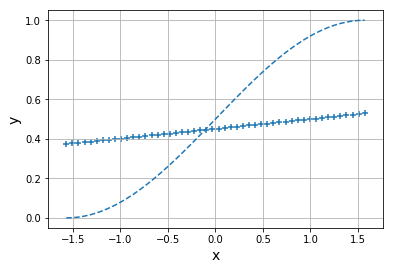

Epoch: 0
Error: 2.4930145826202508


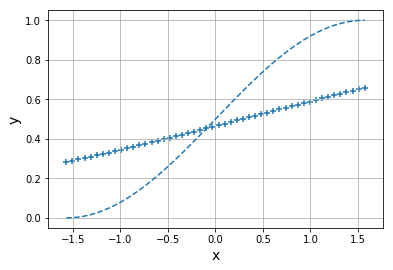

Epoch: 1
Error: 1.5371660301488528


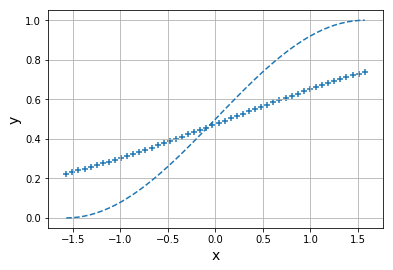

Epoch: 2
Error: 1.021171264140759


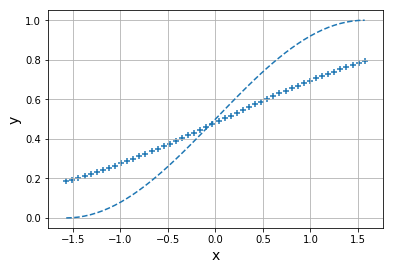

Epoch: 3
Error: 0.7258933156707209


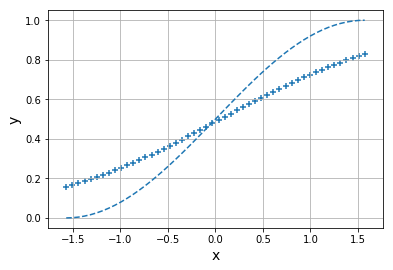

Epoch: 4
Error: 0.5442389354075363


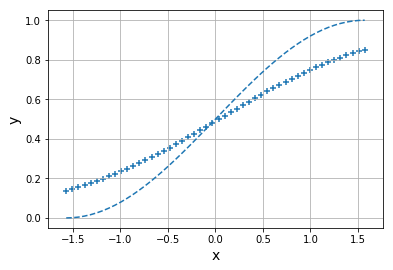

Epoch: 5
Error: 0.4242833509813842


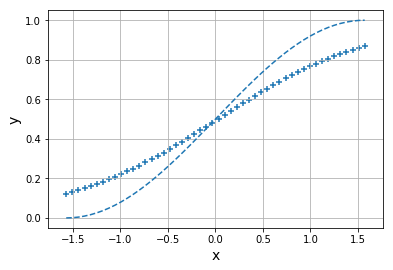

Epoch: 6
Error: 0.34022528006053454


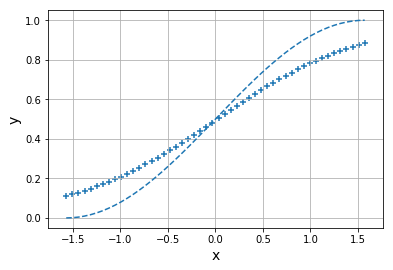

Epoch: 7
Error: 0.27939209854374475


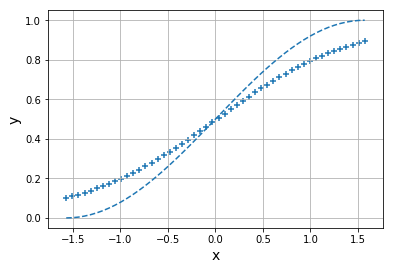

Epoch: 8
Error: 0.23353294551245102


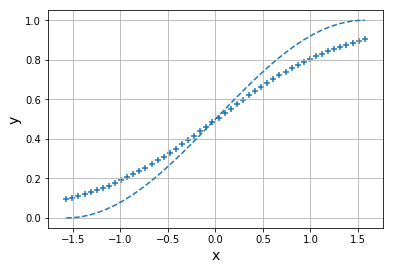

Epoch: 9
Error: 0.19812601707486588


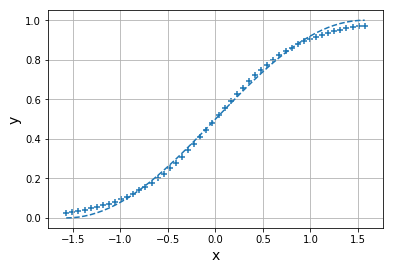

Epoch: 100
Error: 0.0096042424848388


In [4]:
# --- 固定値 ---
eta = 0.1  # 学習係数
epoch = 100  # エポック数

# --- 初期値 --- 
w = 0.2  # 重み
b = -0.2  # バイアス

#  --- 学習 --
for i in range(epoch):
    
    if i < 10:  # 経過を最初の10エポックだけ表示
        Y = forward(X, w, b) 
        show_output(X, Y, T, i)
    
    idx_rand = np.arange(n_data)  # 0からn_data-1までの整数
    np.random.shuffle(idx_rand)  # シャッフルする

    for j in idx_rand:  #ランダムなサンプル
        
        x = X[j]    # 入力
        t = T[j]  # 正解
        
        y = forward(x, w, b)  # 順伝播
        grad_w, grad_b = backward(x, y, t)  # 逆伝播
        w -= eta * grad_w  # （式 3）重みの更新
        b -= eta * grad_b  # （式 4）バイアスの更新

# --- 最後に結果を表示 --- 
Y = forward(X, w, b) 
show_output(X, Y, T, epoch)